# <b>Image Captioning <B>#

Install necessary libraries:

In [23]:
pip install torch torchvision transformers matplotlib


Import Libraries

In [24]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt


Load the Pre-trained Model
We will use the BLIP model (BlipForConditionalGeneration) and its corresponding processor (BlipProcessor).

In [25]:
# Load the pre-trained BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Set the device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

Load and Preprocess the Image
Load a sample image and preprocess it using the BLIP processor.

In [26]:
# Load a sample image
image_path = "/content/drive/MyDrive/plant.jpeg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt").to(device)


Generate Captions
Generate captions using the model's generate method.

In [27]:
# Generate captions
output = model.generate(**inputs)

# Decode the generated caption
caption = processor.decode(output[0], skip_special_tokens=True)
print(f"Generated Caption: {caption}")


Generated Caption: a small plant growing out of a rock


Visualize the Result
Display the image along with the generated caption.

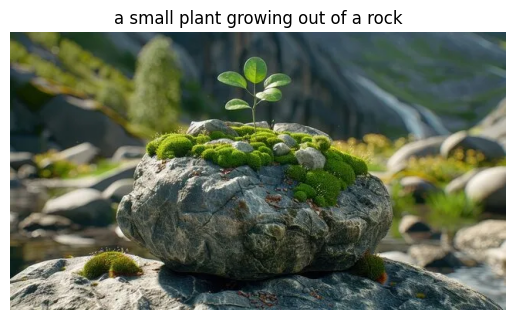

In [28]:
# Visualize the image and caption
plt.imshow(image)
plt.title(caption)
plt.axis("off")
plt.show()


Generated Caption: ipl players celebrate after the match


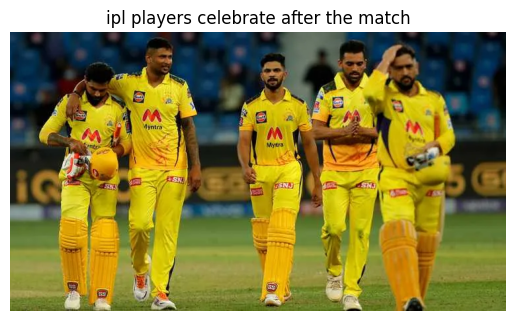

In [29]:
# Load a sample image
image_path = "/content/drive/MyDrive/dc-vs-csk-qualifier-1-ipl-2021.jpeg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt").to(device)

# Generate captions
output = model.generate(**inputs)

# Decode the generated caption
caption = processor.decode(output[0], skip_special_tokens=True)
print(f"Generated Caption: {caption}")
# Visualize the image and caption
plt.imshow(image)
plt.title(caption)
plt.axis("off")
plt.show()
